In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [22]:
sns.set()

In [23]:
column1 = list(['Unnamed: 0', 'Method', 'N', 'Ns', 'Corr.dim1', 'Corr.dim2',
       'Corr.dim', 'etaDhat', 'MAD.in.sample', 'MAD.out.sample',
       'MAPE.in.sample1', 'MAPE.out.sample1', 'MAPE.in.sample2',
       'MAPE.out.sample2', 'RMSE.in.sample', 'RMSE.out.sample',
       'condiCoverageRate.Chi2', 'PointCoverageRate.Chi2',
       'condiCoverageRate.Empirical', 'PointCoverageRate.Empirical',
       'condiCoverageRate.CV.Empirical', 'PointCoverageRate.CV.Empirical',
       'AvLChi2', 'AvLEmpirical', 'AvLEmpiricalCV',
       'CV.AddPoints.Empirical', 'TimeTaken', 'Sparsity', 'SparsityRate',
       'SparsityDiag', 'SparsityDiagRate', 'Hu', 'Huempiric',
       'HuempiricCV', 'mean', 'm_add', 'Kchi2', 'TrueAvL', 'OverlapChi',
       'OverlapEmpirical', 'OverlapEmpiricalCV', 'seed'])

In [24]:
def filename(runtime,method,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,K,affi):
    words = [runtime,method,dist,str(threshold),str(p), str(N), str(D),str(int(sigma*100)),HO,sparsity, str(Alpha),str(K),str(affi),"Simu_result.csv"]
    file = "_".join(words)
    return file

In [25]:
def data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi):
        
    file1 = filename(runtime,"AIC",dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,K,affi)
    
    print(file1)

    AICCV = pd.read_csv(file1)


    if AICCV.shape[0] != N_rep:
        print("sort")
        AICCV = pd.read_csv(file1,header = None)
        AICCV.columns = column1


    AICCV = AICCV.sort_values(by='seed').reset_index(drop=True)

    index = ((AICCV['mean']< mean_thresholod) & (AICCV['mean']> -mean_thresholod)).values
    AICCV = AICCV.iloc[index,:]


    #print(AICCV.shape)

    AICCV = AICCV.rename(columns={"condiCoverageRate.Chi2": "CoverageRateChi2",
                                  'condiCoverageRate.Empirical':'CoverageRateRED', 
                                  'condiCoverageRate.CV.Empirical': 'CoverageRateRED(Bootstrap)'})
    
    result = pd.concat([AICCV],sort=False)
    result['D'] = D;result['sigma'] = sigma; result['p'] = p; result['dist'] = dist;result['sparsity'] = sparsity; result['Alpha'] = Alpha
    result['K'] = K; result['covariance'] = affi

    result['OverlapChiPercentTrue']  = result['OverlapChi']/result['TrueAvL']
    result['OverlapEmpiricalPercentTrue']  = result['OverlapEmpirical']/result['TrueAvL']
    result['OverlapEmpiricalCVPercentTrue']  = result['OverlapEmpiricalCV']/result['TrueAvL']

    
    result['OverlapChiPercent']  = result['OverlapChi']/result['AvLChi2']
    result['OverlapEmpiricalPercent']  = result['OverlapEmpirical']/result['AvLEmpirical']
    result['OverlapEmpiricalCVPercent']  = result['OverlapEmpiricalCV']/result['AvLEmpiricalCV']

    result['CV.AddPoints.Empirical'] = result['CV.AddPoints.Empirical']/200

    
    return result

# Experiment 1

In [26]:
result_table = pd.DataFrame()

#############################################################################################
# Noise 0.25
sigma = 0.25
N_rep = 400
mean_thresholod = 0.05
D = 4
p = 1
threshold = 999
HO = "TRUE"
dist = 'norm'
Alpha = 0.1
runtime = "20200711"
sparsity ="FALSE"
affi = 4
K = 1500

N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)


#############################################################################################
# Noise 0.50
sigma = 0.50
N_rep = 400
D = 4
p = 1
threshold = 999
HO = "TRUE"
dist = 'norm'
Alpha = 0.1
runtime = "20200711"
sparsity ="FALSE"
affi = 4
K = 1500

N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

20200711_AIC_norm_999_1_100_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_200_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_400_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_800_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_1600_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_100_4_50_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_200_4_50_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_400_4_50_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_800_4_50_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_1600_4_50_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort


In [27]:
pivot = pd.pivot_table(result_table,index =['sigma','N',],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'OverlapChiPercent','OverlapEmpiricalCVPercent',
                       'Sparsity','SparsityRate', 'SparsityDiag', 'SparsityDiagRate','Kchi2','Hu', 'Huempiric'],aggfunc='mean')


pivot = pivot.loc[:,["Corr.dim",'MAD.out.sample','TrueAvL',
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',]]
display(pivot)


Corr.dim  MAD.out.sample  TrueAvL  CoverageRateChi2  AvLChi2  OverlapChiPercentTrue  CoverageRateRED  AvLEmpirical  OverlapEmpiricalPercentTrue  CoverageRateRED(Bootstrap)  AvLEmpiricalCV  CV.AddPoints.Empirical  OverlapEmpiricalCVPercentTrue
sigma N                                                                                                                                                                                                                                                       
0.250 100          4           0.297    1.661             0.851    1.726                  0.948            0.650         1.420                        0.829                       0.805           1.626                   4.009                          0.919
      200          4           0.288    1.664             0.888    1.753                  0.970            0.774         1.549                        0.900                       0.863           1.690                   3.893                          0.954
      400          4           0.284    1.661             0.901    1.765                  0.980            0.846         1.648                        0.947                       0.884           1.722                   3.196                          0.971
      800          4           0.282    1.662             0.908    1.771                  0.985            0.889         1.723                        0.975                       0.895           1.736                   0.867                          0.978
      1600         4           0.282    1.663             0.911    1.777                  0.988            0.911         1.779                        0.989                       0.911           1.779                   0.000                          0.989
0.500 100          4           0.595    3.319             0.851    3.447                  0.949            0.648         2.835                        0.829                       0.805           3.250                   4.070                          0.920
      200          4           0.575    3.327             0.890    3.506                  0.970            0.775         3.097                        0.901                       0.863           3.379                   3.916                          0.954
      400          4           0.567    3.324             0.901    3.530                  0.980            0.846         3.296                        0.947                       0.884           3.443                   3.185                          0.971
      800          4           0.564    3.325             0.908    3.542                  0.985            0.889         3.444                        0.975                       0.895           3.471                   0.869                          0.978
      1600         4           0.563    3.326             0.910    3.553                  0.988            0.911         3.558                        0.989                       0.911           3.558                   0.000                          0.989

In [28]:
pivot = pd.pivot_table(result_table,index =['sigma','N',],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'OverlapChiPercent','OverlapEmpiricalCVPercent',
                       'Sparsity','SparsityRate', 'SparsityDiag', 'SparsityDiagRate','Kchi2'],aggfunc='std')


pivot = pivot.loc[:,["Corr.dim",'MAD.out.sample','TrueAvL',
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',]]

In [29]:
def boxplots_CR(hue,result_table_select):
    
    plt.figure(figsize = (10,3))
    sns.boxplot(y="CoverageRateChi2",x='N',hue=hue,data= result_table_select)
    plt.title("(a) Coverage rate by $\chi^2$")
    plt.axhline(0.9,color='black',ls='--')
    plt.ylabel("")
    plt.xlabel("")
    plt.ylim(0.3,1.01)
    file = "Experiment1_chi2.png"
    plt.savefig(file,dpi=100,bbox_inches='tight')
    plt.show();

    plt.figure(figsize = (10,3))
    sns.boxplot(y="CoverageRateRED",x='N',hue=hue,data=result_table_select)
    plt.axhline(0.9,color='black',ls='--')
    plt.title("(b) Coverage rate by ECDF")
    plt.ylabel("")
    plt.xlabel("")
    plt.ylim(0.3,1.01)
    file = "Experiment1_ECDF.png"
    plt.savefig(file,dpi=100,bbox_inches='tight')
    plt.show();

    plt.figure(figsize = (10,3))
    sns.boxplot(y="CoverageRateRED(Bootstrap)",x='N',hue=hue,data=result_table_select)
    plt.axhline(0.9,color='black',ls='--')
    plt.title("(c) Coverage rate by ECDF-B")
    plt.ylabel("")
    plt.ylim(0.3,1.01)
    file = "Experiment1_ECDFB.png"
    plt.savefig(file,dpi=100,bbox_inches='tight')
    plt.show();

    #plt.suptitle("sigma = %0.2f"%sigma)

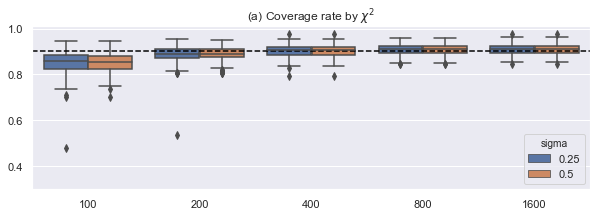

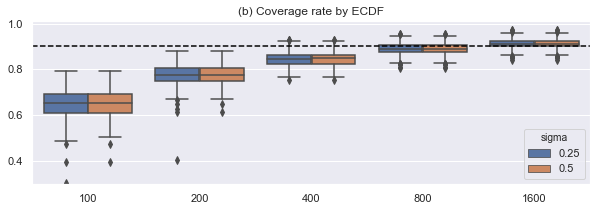

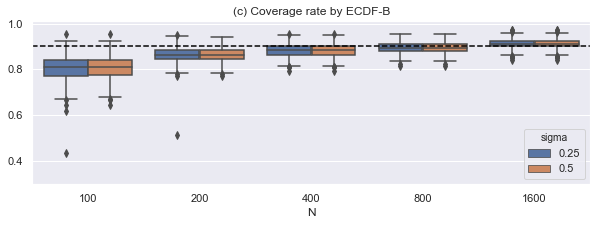

In [30]:
result_table_select = result_table #[result_table['sigma']==sigma]
boxplots_CR('sigma',result_table_select)

# Experiment 2

In [31]:
result_table = pd.DataFrame()

N_rep = 400
D = 6
sigma = 0.25
p = 1
threshold = 999
HO = "TRUE"
Alpha = 0.1
runtime = "20200711"
sparsity ="FALSE"
affi = 4
K = 1500

dist = 'norm'
N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

dist = 't'
N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

dist = 'exp'
N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)


20200711_AIC_norm_999_1_100_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_200_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_400_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_800_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_1_1600_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_t_999_1_100_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_t_999_1_200_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_t_999_1_400_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_t_999_1_800_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_t_999_1_1600_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_exp_999_1_100_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_exp_999_1_200_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_exp_999_1_400_6_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_exp_999_1_800_6

In [32]:
pivot = pd.pivot_table(result_table,index =['N','dist'],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'Hu', 'Huempiric'],aggfunc='mean')

pivot = pivot.loc[:,["Corr.dim", 'MAD.out.sample','TrueAvL',
                     'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                     'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue']]

display(pivot)

Corr.dim  MAD.out.sample  TrueAvL  CoverageRateChi2  AvLChi2  OverlapChiPercentTrue  CoverageRateRED(Bootstrap)  AvLEmpiricalCV  CV.AddPoints.Empirical  OverlapEmpiricalCVPercentTrue
N    dist                                                                                                                                                                                        
100  exp          6           0.349    2.091             0.850    2.284                  0.951                       0.820           2.171                   3.992                          0.931
     norm         6           0.364    2.169             0.849    2.298                  0.952                       0.787           2.138                   4.203                          0.920
     t            6           0.355    2.119             0.851    2.288                  0.952                       0.806           2.146                   4.089                          0.926
200  exp          6           0.339    2.090             0.879    2.324                  0.969                       0.870           2.289                   3.986                          0.963
     norm         6           0.353    2.174             0.890    2.332                  0.969                       0.859           2.237                   4.054                          0.953
     t            6           0.344    2.124             0.886    2.325                  0.972                       0.866           2.251                   4.050                          0.960
400  exp          6           0.333    2.094             0.892    2.344                  0.977                       0.891           2.337                   3.280                          0.976
     norm         6           0.349    2.174             0.907    2.347                  0.978                       0.886           2.278                   3.225                          0.968
     t            6           0.340    2.124             0.902    2.346                  0.980                       0.888           2.301                   3.362                          0.972
800  exp          6           0.332    2.099             0.895    2.356                  0.981                       0.893           2.332                   1.962                          0.980
     norm         6           0.348    2.174             0.911    2.352                  0.983                       0.890           2.291                   0.815                          0.974
     t            6           0.338    2.130             0.905    2.355                  0.983                       0.893           2.313                   1.737                          0.976
1600 exp          6           0.331    2.100             0.898    2.359                  0.983                       0.898           2.318                   0.179                          0.982
     norm         6           0.346    2.171             0.916    2.359                  0.985                       0.918           2.365                   0.000                          0.986
     t            6           0.338    2.125             0.907    2.360                  0.986                       0.902           2.345                   0.031                          0.983

In [33]:
pivot = pd.pivot_table(result_table,index =['N','dist'],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'Hu', 'Huempiric'],aggfunc='std')

pivot = pivot.loc[:,["Corr.dim", 'MAD.out.sample','TrueAvL',
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue']]

display(pivot)

Corr.dim  MAD.out.sample  TrueAvL  CoverageRateChi2  AvLChi2  OverlapChiPercentTrue  CoverageRateRED(Bootstrap)  AvLEmpiricalCV  CV.AddPoints.Empirical  OverlapEmpiricalCVPercentTrue
N    dist                                                                                                                                                                                        
100  exp          0           0.015    0.073             0.040    0.128                  0.025                       0.052           0.151                   0.936                          0.033
     norm         0           0.010    0.044             0.040    0.069                  0.016                       0.053           0.081                   0.862                          0.024
     t            0           0.014    0.062             0.045    0.133                  0.022                       0.055           0.128                   0.938                          0.032
200  exp          0           0.012    0.072             0.031    0.106                  0.018                       0.035           0.130                   0.964                          0.022
     norm         0           0.009    0.042             0.029    0.054                  0.011                       0.039           0.073                   0.854                          0.017
     t            0           0.011    0.061             0.031    0.092                  0.014                       0.034           0.093                   0.929                          0.019
400  exp          0           0.011    0.073             0.025    0.079                  0.014                       0.025           0.094                   0.951                          0.016
     norm         0           0.008    0.041             0.023    0.042                  0.009                       0.025           0.052                   1.005                          0.012
     t            0           0.010    0.063             0.024    0.070                  0.012                       0.028           0.075                   1.011                          0.014
800  exp          0           0.013    0.074             0.025    0.057                  0.012                       0.028           0.071                   0.845                          0.013
     norm         0           0.007    0.042             0.022    0.036                  0.007                       0.027           0.040                   0.684                          0.010
     t            0           0.009    0.070             0.023    0.053                  0.011                       0.024           0.055                   0.723                          0.014
1600 exp          0           0.012    0.072             0.023    0.042                  0.011                       0.023           0.046                   0.393                          0.011
     norm         0           0.008    0.041             0.022    0.032                  0.007                       0.022           0.034                   0.000                          0.007
     t            0           0.011    0.066             0.022    0.045                  0.009                       0.022           0.044                   0.191                          0.010

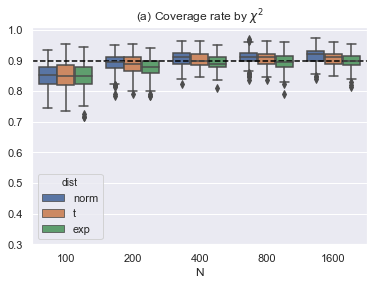

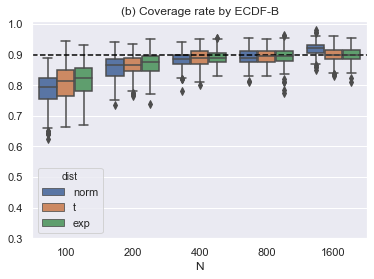

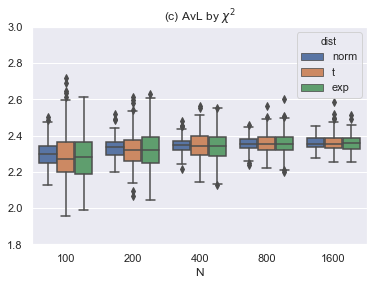

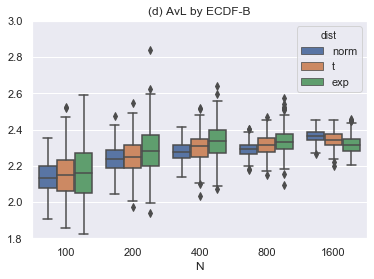

In [34]:
hue = 'dist'
result_table_select = result_table


#plt.figure(figsize = (10,3))
sns.boxplot(y="CoverageRateChi2",x='N',hue=hue,data= result_table_select)
plt.title("(a) Coverage rate by $\chi^2$")
plt.axhline(0.9,color='black',ls='--')
plt.ylabel("")
plt.ylim(0.3,1.01)
file = "Experiment2_Chi2_CR.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();


sns.boxplot(y="CoverageRateRED(Bootstrap)",x='N',hue=hue,data=result_table_select)
plt.axhline(0.9,color='black',ls='--')
plt.title("(b) Coverage rate by ECDF-B")
plt.ylabel("")
plt.ylim(0.3,1.01)
file = "Experiment2_ECDFB_CR.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();

sns.boxplot(y="AvLChi2",x='N',hue=hue,data= result_table_select)
plt.title("(c) AvL by $\chi^2$")
#plt.axhline(0.9,color='black',ls='--')
plt.ylabel("")
plt.ylim(1.8,3)
file = "Experiment2_Chi2_AvL.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();


sns.boxplot(y="AvLEmpiricalCV",x='N',hue=hue,data=result_table_select)
#plt.axhline(0.9,color='black',ls='--')
plt.title("(d) AvL by ECDF-B")
plt.ylabel("")
plt.ylim(1.8,3)
file = "Experiment2_ECDFB_AvL.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();


# Experiment 3

In [35]:
result_table = pd.DataFrame()

N_rep = 1200
mean_thresholod = 0.05
D = 4
sigma = 0.25
p = 3
threshold = 999
HO = "TRUE"
dist = 'norm'
Alpha = 0.1
#runtime = "20200711"
runtime = "20200802"
affi = 4
K = 1500

sparsity ="FALSE"
N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

sparsity ="TRUE"
N_rep = 400
N = 100
runtime = "20200711"
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

runtime = "20200802"
sparsity ="diag"
N_rep = 400
N = 100
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 200
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 400
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 800
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)
N = 1600
result = data_transform(runtime,dist,threshold,p,N,D,sigma,HO,sparsity,Alpha,column1,K,affi)
result_table = result_table.append(result)

20200802_AIC_norm_999_3_100_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_200_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_400_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_800_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_1600_4_25_TRUE_FALSE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_3_100_4_25_TRUE_TRUE_0.1_1500_4_Simu_result.csv
20200711_AIC_norm_999_3_200_4_25_TRUE_TRUE_0.1_1500_4_Simu_result.csv
20200711_AIC_norm_999_3_400_4_25_TRUE_TRUE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_3_800_4_25_TRUE_TRUE_0.1_1500_4_Simu_result.csv
sort
20200711_AIC_norm_999_3_1600_4_25_TRUE_TRUE_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_100_4_25_TRUE_diag_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_200_4_25_TRUE_diag_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_400_4_25_TRUE_diag_0.1_1500_4_Simu_result.csv
sort
20200802_AIC_norm_999_3_800_

In [36]:
result_table.loc[result_table["sparsity"] == "FALSE","sparsity"] = "non sparse"
result_table.loc[result_table["sparsity"] == "TRUE","sparsity"] = "lag sparse"
result_table.loc[result_table["sparsity"] == "diag","sparsity"] = "diag sparse"

In [37]:
pivot = pd.pivot_table(result_table,index =['sparsity','N'],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'OverlapChiPercent','OverlapEmpiricalCVPercent',
                       'Sparsity','SparsityRate', 'SparsityDiag', 'SparsityDiagRate','Kchi2'],aggfunc='mean')

pivot = pivot.loc[:,["Corr.dim",'MAD.out.sample','TrueAvL',
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',]]

display(pivot)

Corr.dim  MAD.out.sample  TrueAvL  CoverageRateChi2  AvLChi2  OverlapChiPercentTrue  CoverageRateRED(Bootstrap)  AvLEmpiricalCV  CV.AddPoints.Empirical  OverlapEmpiricalCVPercentTrue
sparsity    N                                                                                                                                                                                           
diag sparse 100          4           0.332    1.657             0.803    1.705                  0.920                       0.750           1.606                   3.708                          0.891
            200          4           0.297    1.664             0.864    1.746                  0.955                       0.838           1.685                   3.915                          0.940
            400          4           0.290    1.661             0.893    1.777                  0.973                       0.876           1.734                   3.090                          0.964
            800          4           0.289    1.663             0.904    1.801                  0.981                       0.893           1.763                   0.861                          0.973
            1600         4           0.282    1.660             0.911    1.781                  0.986                       0.913           1.784                   0.000                          0.987
lag sparse  100          4           0.302    1.661             0.832    1.714                  0.936                       0.780           1.613                   3.973                          0.906
            200          4           0.292    1.664             0.880    1.756                  0.963                       0.851           1.689                   3.934                          0.945
            400          4           0.286    1.661             0.898    1.772                  0.976                       0.881           1.730                   3.119                          0.967
            800          4           0.284    1.662             0.905    1.779                  0.982                       0.892           1.743                   0.969                          0.975
            1600         4           0.284    1.662             0.910    1.785                  0.987                       0.909           1.786                   0.000                          0.987
non sparse  100          4           0.310    1.660             0.834    1.768                  0.939                       0.773           1.645                   4.082                          0.905
            200          4           0.296    1.664             0.882    1.787                  0.962                       0.849           1.712                   3.904                          0.944
            400          4           0.289    1.661             0.900    1.790                  0.976                       0.881           1.740                   2.975                          0.964
            800          4           0.286    1.666             0.905    1.785                  0.980                       0.889           1.744                   0.863                          0.972
            1600         4           0.285    1.662             0.910    1.792                  0.986                       0.911           1.795                   0.000                          0.986

In [38]:
pivot = pd.pivot_table(result_table,index =['sparsity','N'],
               values=['TimeTaken','mean','Corr.dim1', 'Corr.dim2','Corr.dim','etaDhat', "m_add", 'MAD.out.sample','TrueAvL', 
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED','AvLEmpirical', 'OverlapEmpiricalPercentTrue',
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',
                       'OverlapChiPercent','OverlapEmpiricalCVPercent',
                       'Sparsity','SparsityRate', 'SparsityDiag', 'SparsityDiagRate','Kchi2'],aggfunc='std')

pivot = pivot.loc[:,["Corr.dim",'MAD.out.sample','SparsityRate','TrueAvL',
                       'CoverageRateChi2','AvLChi2','OverlapChiPercentTrue', 
                       'CoverageRateRED(Bootstrap)','AvLEmpiricalCV','CV.AddPoints.Empirical','OverlapEmpiricalCVPercentTrue',]]

display(pivot)

Corr.dim  MAD.out.sample  SparsityRate  TrueAvL  CoverageRateChi2  AvLChi2  OverlapChiPercentTrue  CoverageRateRED(Bootstrap)  AvLEmpiricalCV  CV.AddPoints.Empirical  OverlapEmpiricalCVPercentTrue
sparsity    N                                                                                                                                                                                                         
diag sparse 100          0           0.175         0.120    0.030             0.104    0.070                  0.062                       0.107           0.079                   1.088                          0.065
            200          0           0.033         0.133    0.029             0.053    0.050                  0.026                       0.060           0.060                   0.975                          0.030
            400          0           0.033         0.148    0.031             0.029    0.146                  0.011                       0.035           0.134                   1.055                          0.014
            800          0           0.046         0.159    0.029             0.023    0.286                  0.008                       0.026           0.246                   0.845                          0.010
            1600         0           0.010         0.165    0.031             0.020    0.041                  0.007                       0.021           0.031                   0.000                          0.007
lag sparse  100          0           0.014         0.108    0.030             0.046    0.071                  0.022                       0.058           0.082                   0.934                          0.031
            200          0           0.011         0.109    0.028             0.030    0.054                  0.013                       0.037           0.062                   0.989                          0.018
            400          0           0.009         0.105    0.031             0.025    0.043                  0.008                       0.029           0.052                   1.134                          0.013
            800          0           0.009         0.102    0.030             0.023    0.037                  0.007                       0.025           0.038                   0.920                          0.009
            1600         0           0.008         0.105    0.033             0.023    0.028                  0.006                       0.023           0.030                   0.000                          0.007
non sparse  100          0           0.017         0.129    0.029             0.047    0.090                  0.020                       0.061           0.093                   0.997                          0.029
            200          0           0.016         0.126    0.028             0.031    0.096                  0.013                       0.037           0.095                   0.907                          0.019
            400          0           0.013         0.124    0.031             0.026    0.062                  0.010                       0.032           0.061                   1.138                          0.015
            800          0           0.010         0.121    0.030             0.024    0.043                  0.008                       0.025           0.042                   0.909                          0.011
            1600         0           0.012         0.122    0.031             0.023    0.059                  0.007                       0.022           0.058                   0.000                          0.007

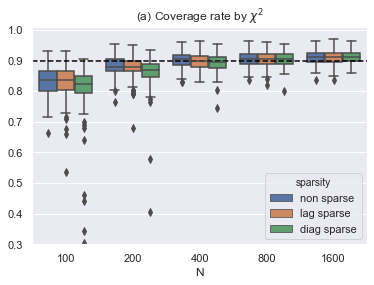

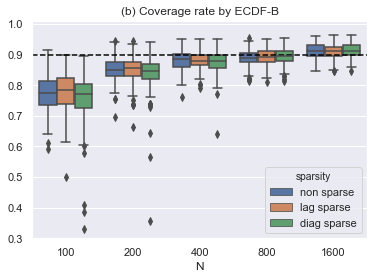

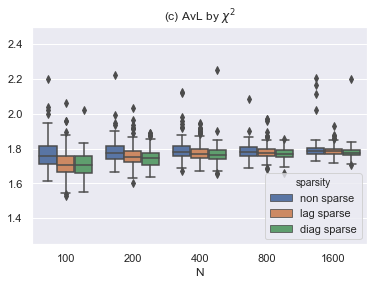

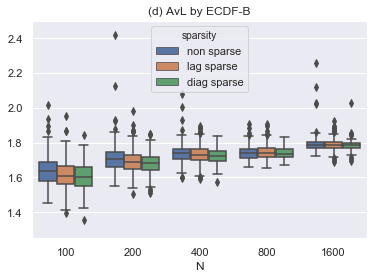

In [39]:
hue = 'sparsity'
palette = None
result_table_select = result_table


sns.boxplot(y="CoverageRateChi2",x='N',hue=hue,data= result_table_select,palette=palette)
plt.title("(a) Coverage rate by $\chi^2$")
plt.axhline(0.9,color='black',ls='--')
plt.ylabel("")
plt.ylim(0.3,1.01)
file = "Experiment3_Chi2_CR.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();


sns.boxplot(y="CoverageRateRED(Bootstrap)",x='N',hue=hue,data=result_table_select,palette=palette)
plt.axhline(0.9,color='black',ls='--')
plt.title("(b) Coverage rate by ECDF-B")
plt.ylabel("")
plt.ylim(0.3,1.01)
file = "Experiment3_ECDFB_CR.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();

sns.boxplot(y="AvLChi2",x='N',hue=hue,data= result_table_select,palette=palette)
plt.title("(c) AvL by $\chi^2$")
#plt.axhline(0.9,color='black',ls='--')
plt.ylabel("")
plt.ylim(1.25,2.5)
file = "Experiment3_Chi2_AvL.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();


sns.boxplot(y="AvLEmpiricalCV",x='N',hue=hue,data=result_table_select,palette=palette)
#plt.axhline(0.9,color='black',ls='--')
plt.title("(d) AvL by ECDF-B")
plt.ylabel("")
plt.ylim(1.25,2.5)
file = "Experiment3_ECDFB_AvL.png"
plt.savefig(file,dpi=300,bbox_inches='tight')
plt.show();
